<a href="https://colab.research.google.com/github/Hassanat-Awodipe/TechBuddies/blob/main/DPhi_Data_Visualization_Bootcamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DPhi Data Visualization Assignment Details

Dear Learner, 

Congratulations, you have studied Data Visualization all the way through the end of this bootcamp!!! This is the final graded hands-on exercise where you will be accomplishing the below mentioned task.

# Step 1: Select a Tabular Dataset of your choice

*   https://www.kdnuggets.com/datasets/index.html
*   https://dphi.tech/challenges/#past 
* https://pub.towardsai.net/best-datasets-for-machine-learning-data-science-computer-vision-nlp-ai-c9541058cf4f  
* https://medium.com/analytics-vidhya/top-100-open-source-datasets-for-data-science-cd5a8d67cc3d

or you can pick any dataset of your interest on the internet and add reference to it


# Evaluation Criteria

Your submission will be evaluated using the following criteria:

* You must ensure that the dataset is tabular.  
* You must ask and answer at least 3 questions about the dataset
*   Your submission must include at least 3 visualizations (graphs)
*   Your submission must include explanations using markdown cells, apart from the code.
*   Your work must not be plagiarized i.e. copied for somewhere else.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Employee_compensation.csv to Employee_compensation.csv


In [6]:
#read the data
emp_comp = pd.read_csv('Employee_compensation.csv')
emp_comp

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


#Step 2: Perform Exploratory Analysis & Visualization

1. Explore distributions of numeric columns using histograms etc.
2. Explore relationships between columns using scatter plots, bar charts etc.
3. Make a note of interesting insights from the exploratory analysis


#Before the Analysis
**Some of the columns are not descriptive enough so I renamed them.**

In [108]:
emp_comp.rename(columns={'DC':'Dept_Code', 'UC': 'Union_Code', 'JF':'Job_Family', 'EI':'Emp_ID', 'H/D':'Medical_Ins', 'YT':'Year_Type'}, inplace = True)
emp_comp

,Year,OGC,OG,Dept_Code,Dept,Union_Code,Union,Job_Family,Job,Emp_ID,Salaries,Overtime,Medical_Ins,Year_Type,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [ ]:
emp_comp.describe(include= 'all')

***Breif Summary of the Dataset***

This is a dataset of employee compensation over a certain period of years. There are 1136 unique jobs. Each job has a job family that belongs to a deptartment in an organisation.

Realated *jobs* belong to the same *job family*. For example, a **sergeant** and a **police officer** both belong to the same job family called *Police* *Services*.

Different job families can belong to the same dept. For example, *Nursing* job family and *Dietary and Food* job family both belong to the *dept* of *Public Health*.

The *job* determines the *union* to which the workers belong. An **IS Business Analyst-Principal** and a **Biologist I/II** both belong to the same union of *Prof & Tech Engineers - Miscellaneous, Local 21* while a **Nursing Supervisor** *(Teamsters - Supervising Nurses, Local 856 union)* and a **Nurse Practicioner** *(SEIU - Staff and Per Diem Nurses, Local 1021 union)* belong to different union despite being of the same job family, *Nursing*

Although, a **stationary engineer** and an **automotive mechanic** both belong to the same job family of *journeyman trade*, they may each have different depts. E.g. a stationary engineer is in the *PUC Water dept* and an automotive mechanic is in *Municipal Transport Agency dept*. 

Another stationary engineer may also be in the MTA. And a **Water Quality Tech III** in the *Lab, Pharmacy & Med Techs* job family will be found in the *PUC water* dept. This is becasue different jobs can be in the same department.

The department determines the organisation. Different depts may belong to the same organisation as there are just 7 unique organisations for all 1136 unique jobs. Same depts belong to the same organisation.

In sumamry, the context in which the workers work determines their job family and dept.

The goal of this analysis is to explore how the salaries, overtime and medical insurance and total copensation is payed based on the job, job family, dept and organisation of the workers.

# Step 3: Exploration & Inference

1. Ask at least 3 interesting questions about your dataset
2. Answer the questions by computing the results by plotting graphs using Matplotlib
3. Add concluding remarks


#**Q1. Which organisation occurs the most? Find all the depts in that organisation  for the dataset?**

In [50]:
emp_comp['OG'].value_counts()

Public Works, Transportation & Commerce     91256
Community Health                            62828
Public Protection                           54769
Human Welfare & Neighborhood Development    26702
Culture & Recreation                        26074
General Administration & Finance            25914
General City Responsibilities                 293
Name: OG, dtype: int64

In [51]:
#find all depts
emp_comp[emp_comp.OG == 'Public Works, Transportation & Commerce']['Dept'].unique()

array(['PUC Hetch Hetchy', 'Municipal Transportation Agency',
       'Airport Commission', 'PUC Public Utilities Commission',
       'PUC Water Department', 'General Services Agency - Public Works',
       'Department of Building Inspection', 'Port',
       'Economic and Workforce Development', 'PUC Wastewater Enterprise',
       'Board of Appeals', 'Recreation and Park Commission', 'Police',
       'Human Services', 'Public Library', 'City Planning',
       'General Services Agency - Technology', 'Controller',
       'General Services Agency - City Admin', 'Public Health',
       'Children and Families Commission',
       'Department of Emergency Management', 'Assessor/Recorder',
       'Human Resources', 'Children, Youth & Their Families',
       'District Attorney', 'Adult Probation'], dtype=object)

The 'Public Works, Transportation & Commerce' organisation occurs the most. It has 27 unique departments under it and a total count of 91256 departments. This shows that many depts occured more than once. The most occuring dept is Municipal Transportsation Agency(MTA) which occured 42135 times.

#**Q2. Which dept do most jobs belong to? How many unique jobs are in that dept?**

In [52]:
#find the dept that occured the most
emp_comp['Dept'].value_counts()

Public Health                             62859
Municipal Transportation Agency           42149
Human Services                            23847
Police                                    22911
Recreation and Park Commission            15968
Airport Commission                        13507
Fire Department                           11564
General Services Agency - Public Works    10958
Sheriff                                    7410
General Services Agency - City Admin       7343
PUC Public Utilities Commission            6758
Public Library                             6597
PUC Water Department                       5813
PUC Wastewater Enterprise                  4114
Superior Court                             3959
PUC Hetch Hetchy                           2894
Juvenile Probation                         2356
City Attorney                              2336
Department of Building Inspection          2218
District Attorney                          2133
Human Resources                         

In [53]:
#then find the number of unique jobs
emp_comp[emp_comp.Dept == 'Public Health']['Job'].value_counts()

Special Nurse                    10440
Registered Nurse                  9012
Patient Care Assistant            4445
Porter                            2571
Licensed Vocational Nurse         1645
                                 ...  
Stationary Eng, Sewage Plant         1
Electrl Trnst Mech, Asst Sprv        1
Operating Room Nurse                 1
EMT/Paramedic/Firefighter            1
Legislative Assistant                1
Name: Job, Length: 297, dtype: int64

There are 62859 jobs altogether in the Public Health dept. 297 unique jobs which means that some jobs occur more than once. Special nurse is the most practiced job in the public health dept for this dataset. 

In [54]:
#summary of the jobs dataframe
emp_comp['Job'].value_counts()

Transit Operator                 17830
Special Nurse                    10445
Registered Nurse                  9062
Public Svc Aide-Public Works      6371
Police Officer 3                  5902
                                 ...  
Commissioner 16700c, No Pay          1
Mobile Equipment Supervisor          1
Accounting Supervisor (OCII)         1
Operating Room Nurse                 1
Cfdntal Sctry To Distric Atty        1
Name: Job, Length: 1136, dtype: int64

A straightforward analysis of the most occuring job shows that 'Transit Operator' are the highest number of employess followed by Special Nurse. 

However, the addition of Special Nurse and Registered Nurse in the Public Health (PH) dept is most likely what made the PH dept to be the dept where the most jobs belong and not the MTA dept which is the dept for most Transit Operators.

#**Q3. Plot a pie chart to show the organisations.**

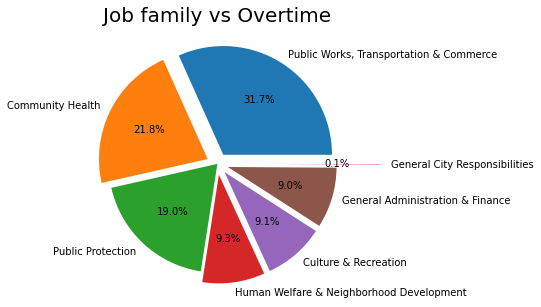

In [55]:
fig, ax= plt.subplots(figsize=(10,5)) 
plt.title("Job family vs Overtime", loc='center', fontsize=20)

x = emp_comp['OG'].value_counts()
OG = ['Public Works, Transportation & Commerce', 'Community Health', 'Public Protection', 'Human Welfare & Neighborhood Development', 'Culture & Recreation', 'General Administration & Finance', 'General City Responsibilities']

plt.pie(x, explode = [0.1, 0.1, 0, 0.1, 0.1, 0.1, 0.5], labels = OG, autopct = '%1.1f%%')

print('')
plt.show()

The pie chart clearly shows how the organisations are distributed.

#**Q4.) Extract the dataset between 10,000 and 12,000. Name it as *ext_emp_comp*. Use it for the following analysis:**

In [56]:
#data extract
ext_emp_comp = emp_comp.loc[10000:12000]
ext_emp_comp

,Year,OGC,OG,Dept_Code,Dept,Union_Code,Union,Job_Family,Job,Emp_ID,Salaries,Overtime,Medical_Ins,Year_Type,Total_Compensation
10000,2016,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",Street Transit,Transit Operator,22216,7164,820,2360.680000,Fiscal,13061
10001,2013,6,General Administration & Finance,ADM,General Services Agency - City Admin,790,"SEIU - Miscellaneous, Local 1021","Payroll, Billing & Accounting",Sr Payroll & Personnel Clerk,35367,46529,0,8133.710000,Calendar,68030
10002,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Police Officer,53559,80953,2224,12424.510000,Calendar,118030
10003,2014,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",Street Transit,Transit Operator,33142,66143,12854,14014.790000,Calendar,127578
10004,2013,1,Public Protection,JUV,Juvenile Probation,965,"Operating Engineers - Sup Probation Ofcrs, Loc...",Probation & Parole,"Sprv Prob Ofc, Juv Court",7040,108637,0,12918.240000,Calendar,142539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,2013,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Library Page,35344,31846,0,8550.760781,Calendar,52683
11997,2016,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",Human Services,Psychiatric Social Worker,14345,2761,0,461.400000,Fiscal,3510
11998,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,351,Municipal Executive Association - Miscellaneous,Management,Manager VII,19189,185433,0,12506.540000,Fiscal,257450
11999,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",Dietary & Food,Dietitian,10332,84084,0,12500.560000,Fiscal,123427


The entire dataset can be hard to analyse. It also may not be easy to understand after plotting. So, in some cases, I analysed only part of the dataset.

**Q. Plot a histogram of employees salaries. Do you think this is a good representation of the entire dataset?**

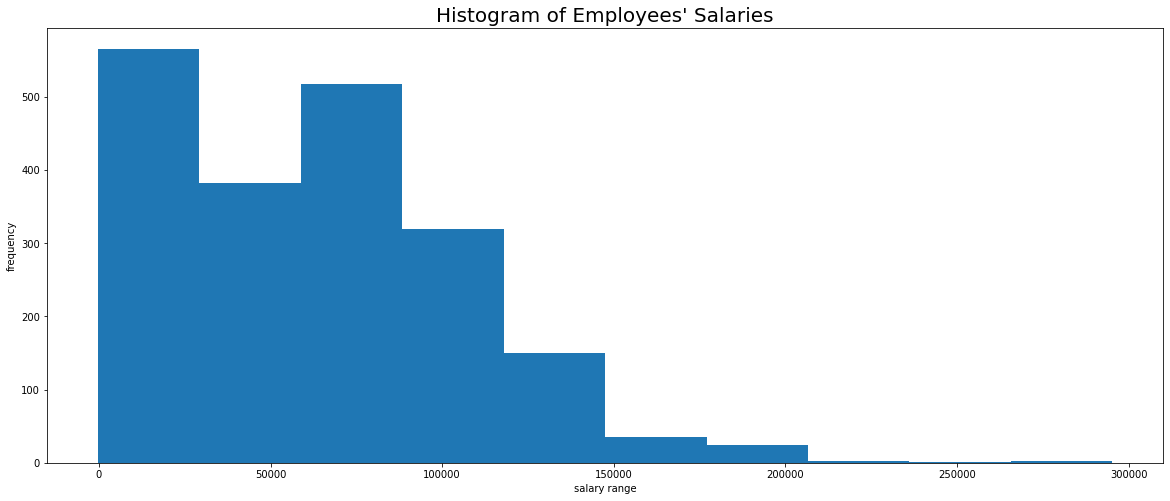

In [60]:
fig, ax= plt.subplots(figsize=(20,8)) 
plt.title("Histogram of Employees' Salaries", loc='center', fontsize=20)

plt.hist(ext_emp_comp.Salaries)


plt.xlabel('salary range')
plt.ylabel('frequency')

print('')
plt.show()

In [45]:
#finding the max, min, and average salary of the main data shows that the extract data is slightly accurate.
max(emp_comp.Salaries), emp_comp.Salaries.mean(), min(emp_comp.Salaries)

(515101, 63262.71313873178, -68771)

To know if the histogram is a good represantion, I found the max, min and mean of the salaries. The mean was not well reprsented. Further analysis showed that the highest salary (>300000) are outliers. The negative salary did not reflect in the histogram.

**Q) What job families are likely to work overtime? Justify your reason with a horizontal bar chart.**

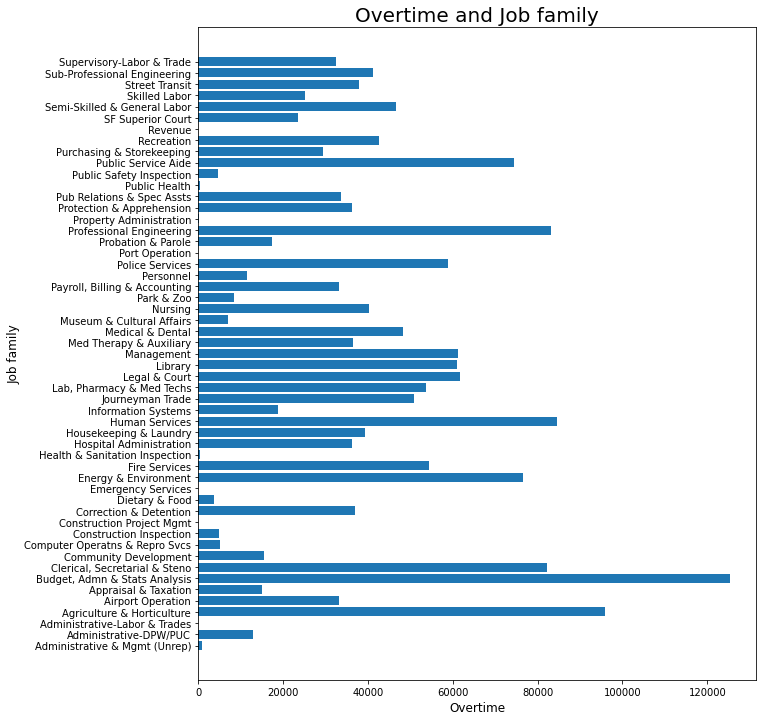

In [63]:
fig, ax = plt.subplots(figsize=(10,12))
plt.title("Overtime and Job family", loc='center', fontsize=20)

plt.barh(sorted(ext_emp_comp.Job_Family), ext_emp_comp.Overtime, )

plt.xlabel("Overtime", fontsize = 12)
plt.ylabel("Job family", fontsize = 12)

print('')
plt.show()

From the plot, the 'Budget, Admin & Stats, Analysis' job family are likely to do the most overtime because they have the highest overtime pay. This is not certain as the rate of overtime pay may not be fixed among the employees and their corresponding level on the job.


**Q) How does a job affect the salary and total compensation? Analyse this using the last 20 items in the extract dataset.**

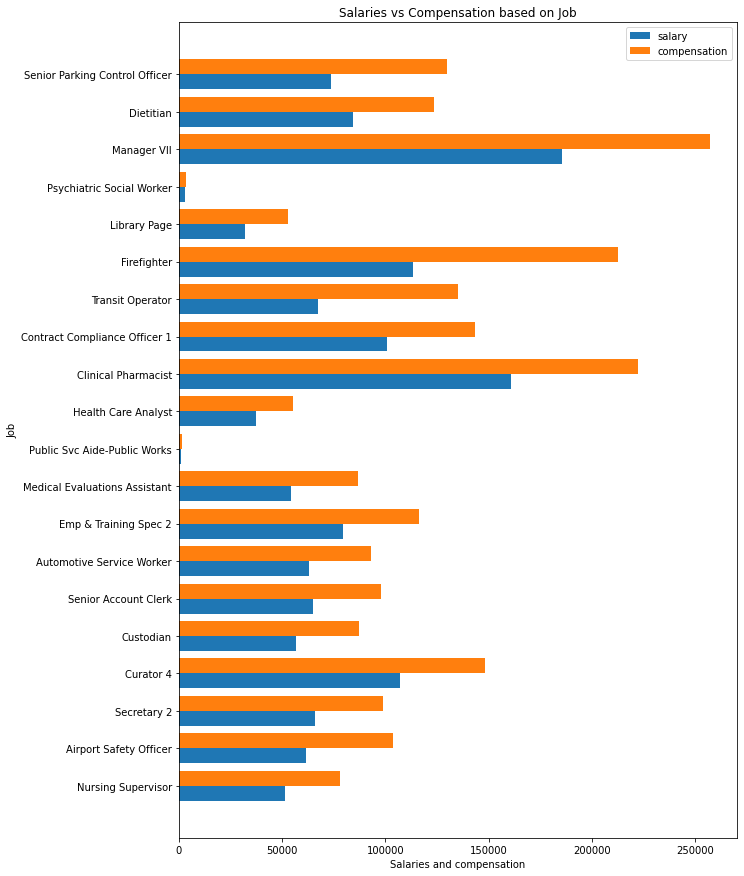

In [55]:
fig, ax = plt.subplots(figsize=(10,15))
plt.title("Salaries vs Compensation based on Job")

X = ext_emp_comp.Job.tail(20)
X_axis = np.arange(len(X))


plt.barh(X_axis- 0.2, ext_emp_comp.Salaries.tail(20), 0.4, label='salary')
plt.barh(X_axis + 0.2, ext_emp_comp.Total_Compensation.tail(20), 0.4, label = 'compensation')

plt.yticks(X_axis, X)
plt.xlabel("Salaries and compensation")
plt.ylabel("Job")
plt.legend()

print('')
plt.show()

For most jobs, the salary makes up more than 70% of the total compensation as seen with the difference in height of the bars.

The *Psychiatric Social Worker* has almost equal bar heights. A Social worker job is one that requires emotional connection which may be why it is highly compensated.

The *Fire fighter* also receives a high compensation. This may be because of the risky nature of the job. 

#**Q5.) Do people with high salaries work overtime? Confirm with a scatter plot using the main data.**

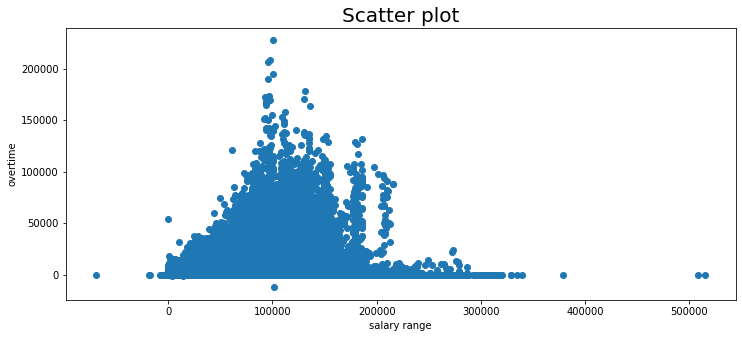

In [62]:
fig,ax = plt.subplots(figsize=(12,5))
plt.title('Scatter plot', loc='center',fontsize=20)

plt.scatter(emp_comp.Salaries, emp_comp.Overtime)

plt.xlabel('salary range')
plt.ylabel('overtime')


print('')
plt.show()

As seen from the scatter plot, when the salary increases towards 300,000, the number of plots reduces. This shows that employees with high salary do not really work over time.

#**Q6.) Plot a stacked bar chart to show the salaries, overtime and medical insurance for the first 200 depts.**

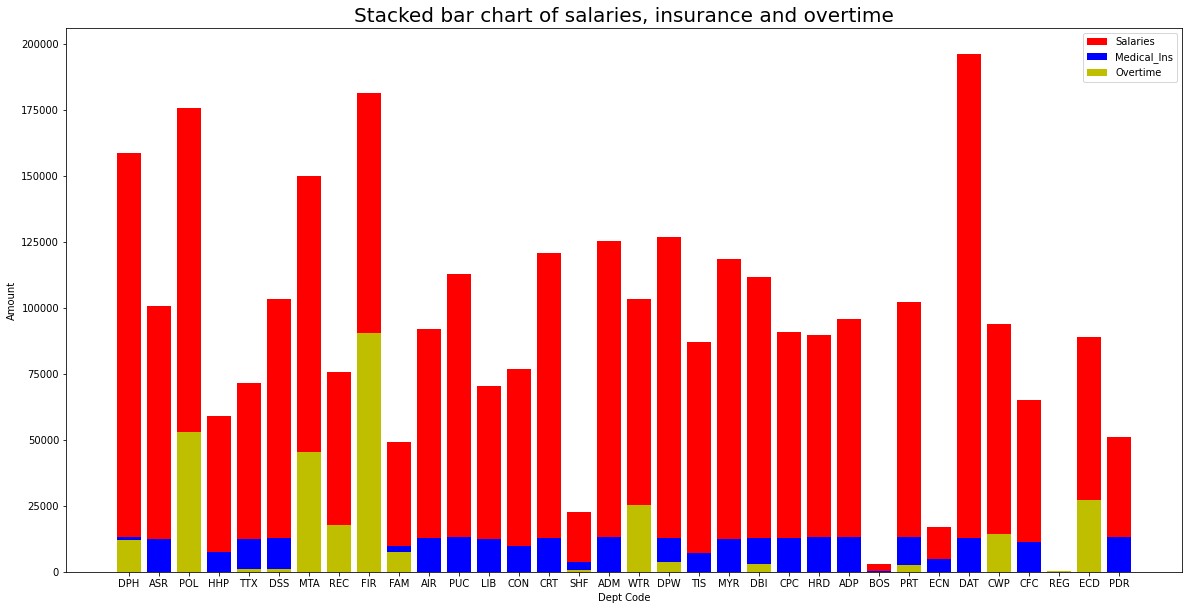

In [79]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('Stacked bar chart of salaries, insurance and overtime', loc='center',fontsize=20)

#stacked bar chart for med ins, overtime, salaries
x = emp_comp.Dept_Code.head(200)
y1= emp_comp.Salaries.head(200)
y2= emp_comp.Medical_Ins.head(200)
y3= emp_comp.Overtime.head(200)

plt.bar(x, y1, color='r', label='Salaries')
plt.bar(x, y2, color='b', label='Medical_Ins')
plt.bar(x, y3, color='y', label='Overtime')

plt.xlabel('Dept Code')
plt.ylabel('Amount')
plt.legend()

print('')
plt.show()

The District Attorney dept with the code (DAT)  appears to have the highest salaries and an average amount of medical insurance. No overtime reflects in the bar.

The Fire dept with the code FIR has a salary bar as high as the overtime bar. Medical insurance did not reflect in the bar.

The Board of Supervisors dept (BOD) has the shortest bar and no overtime reflects.

The General Services Agency - Public Works dept (DPW) shows all three values.


#**Q7. What is the highest and lowest paying job in terms of salary? Get all their details**



In [88]:
#highest salary
emp_comp[emp_comp.Salaries==515101]

,Year,OGC,OG,Dept_Code,Dept,Union_Code,Union,Job_Family,Job,Emp_ID,Salaries,Overtime,Medical_Ins,Year_Type,Total_Compensation,Benefits
275386,2016,6,General Administration & Finance,RET,Retirement System,351,Municipal Executive Association - Miscellaneous,Administrative & Mgmt (Unrep),Chief Investment Officer,3931,515101,0,13068.8,Fiscal,653498,138397


In [91]:
#lowest salary
emp_comp[emp_comp.Salaries==-68771] 

,Year,OGC,OG,Dept_Code,Dept,Union_Code,Union,Job_Family,Job,Emp_ID,Salaries,Overtime,Medical_Ins,Year_Type,Total_Compensation
93572,2014,1,Public Protection,FIR,Fire Department,323,Members of Boards and Commissions,Management,"Bdcomm Mbr, Grp5,M$100/Mo",12878,-68771,0,17.98,Fiscal,-74082


Earlier, we got the highest paying job as 515101. A cheif Investment Officer who seems to be in charge of pension. 

We got the lowest as a negative amount. This may be an error in data collection or that the worker owes the company that amount as salary excess.

#**Q8.) Which job family receives the highest and the smallest medical insurance?  What do you think of this?**

In [84]:
#we find the max and min of the medical insurance
max(emp_comp.Medical_Ins), min(emp_comp.Medical_Ins)

(21872.8, -383.52)

In [82]:
#max med ins
emp_comp[emp_comp.Medical_Ins==21872.8] 

,Year,OGC,OG,Dept_Code,Dept,Union_Code,Union,Job_Family,Job,Emp_ID,Salaries,Overtime,Medical_Ins,Year_Type,Total_Compensation,Benefits
24922,2016,1,Public Protection,CRT,Superior Court,356,Municipal Executive Association - Court,SF Superior Court,Duty Officer,52068,92085,0,21872.8,Fiscal,165835,73750


In [86]:
#min med ins
emp_comp[emp_comp.Medical_Ins==-383.52] 

,Year,OGC,OG,Dept_Code,Dept,Union_Code,Union,Job_Family,Job,Emp_ID,Salaries,Overtime,Medical_Ins,Year_Type,Total_Compensation,Benefits
78558,2014,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,261,"Laborers, Local 261",Semi-Skilled & General Labor,General Laborer,29077,0,0,-383.52,Fiscal,10108,10108


The laborer has a negative medical insurance. This may be because he owes the organisation in which he works for a treatment that he was not insured against. 

A Duty Officer in Public Protection organisation has the highest medical insurance. This may be because of the nature of his work in a Superior Court.

#**Q9. Which job is mostly compensated? Do you think the union plays a role in it?**

To find the amount of compensation, we have to deduct the salaries and overtime. The medical insurance is included as a compensation because it is a benefit that comes with the job. Overtime is not a compensation since it is money paid for spending extra hours at work.

In [9]:
#deduct salaries and overtime
Benefits = emp_comp.Total_Compensation - (emp_comp.Salaries + emp_comp.Overtime)
Benefits.describe()

count    287836.000000
mean      30326.579629
std       20261.392624
min      -21294.000000
25%       11301.000000
50%       32600.000000
75%       43306.250000
max      381424.000000
dtype: float64

In [72]:
#highest compensation
emp_comp[(emp_comp.Total_Compensation - (emp_comp.Salaries + emp_comp.Overtime))==381424]

,Year,OGC,OG,Dept_Code,Dept,Union_Code,Union,Job_Family,Job,Emp_ID,Salaries,Overtime,Medical_Ins,Year_Type,Total_Compensation
100387,2014,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Deputy Chief 3,16517,129150,0,6276.41,Calendar,510574


To determine if the union played a role in it, we will have to consider the benefits received by other workers in the same union and compare with that of workers from different union.


In [16]:
#let us add a new column for benefits
emp_comp['Benefits'] = Benefits
emp_comp

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,Benefits
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158,3962
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784,38325
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708,44154
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323,49405
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106,23293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079,37984
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174,9470
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669,60218
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594,5169


Then we plot a graph. This is easiest way to understand how the benfits are distributed.

In [17]:
#get all the jobs in the union 'Police Officers Association"
POA_emp_comp = emp_comp[emp_comp.Union=="Police Officers' Association"]
POA_emp_comp

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,Benefits
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.870000,Fiscal,242323,49405
9,2013,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Police Officer,8476,111948,4539,12777.170000,Fiscal,160206,43719
35,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Inspector 3,7504,138579,34837,12506.540000,Fiscal,234255,60839
57,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Lieutenant 3,17865,143972,1382,11375.020000,Fiscal,217425,72071
77,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Police Officer 3,26411,20006,4785,2095.390000,Fiscal,33054,8263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287802,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Police Officer,41039,99316,44023,13043.870000,Fiscal,179565,36226
287811,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Police Officer 2,41389,98950,5713,10477.000000,Fiscal,146026,41363
287814,2013,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Lieutenant 3,26711,88012,76,6937.223504,Calendar,210901,122813
287821,2013,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Police Officer 2,15759,117144,1555,12863.330000,Fiscal,165552,46853


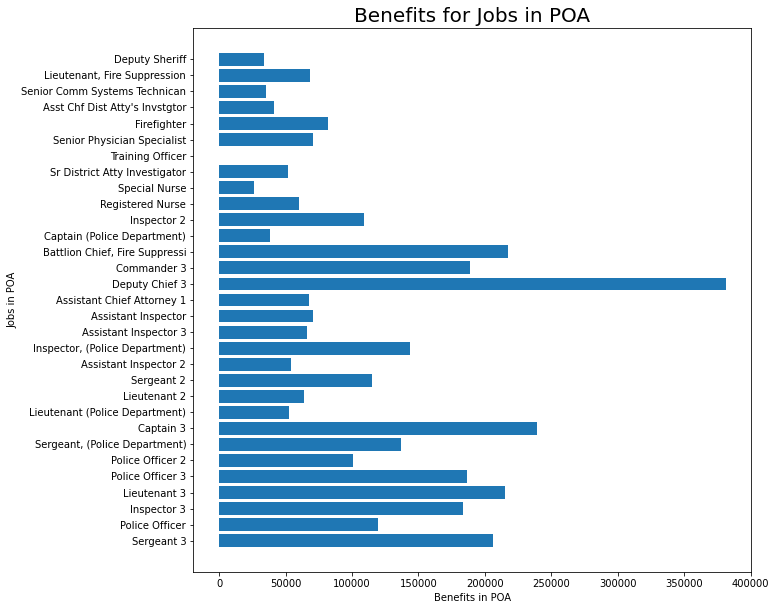

In [119]:
#plot job vs benefits for only jobs in the POA union

f, ax = plt.subplots(figsize=(10,10))
plt.title('Benefits for Jobs in POA', loc='center',fontsize=20)


plt.barh(POA_emp_comp.Job, POA_emp_comp.Benefits)

plt.xlabel('Benefits in POA')
plt.ylabel('Jobs in POA')


print('')
plt.show()

In [26]:
#get the data of other unions that does not include the POA
ben_emp_comp = emp_comp[emp_comp.Union != "Police Officers' Association"]
ben_emp_comp

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,Benefits
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158,3962
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784,38325
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708,44154
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106,23293
5,2014,6,General Administration & Finance,TTX,Treasurer/Tax Collector,790,"SEIU - Miscellaneous, Local 1021",Revenue,Senior Collections Officer,7385,71466,0,12512.55,Fiscal,105849,34383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079,37984
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174,9470
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669,60218
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594,5169


In [27]:
#we find the mean, max and min of benefits of this new data and compare with that of those in the POA
min(ben_emp_comp.Benefits),  ben_emp_comp.Benefits.mean(),  max(ben_emp_comp.Benefits)

(-21294, 29489.88913827566, 277534)

In [28]:
#get the mean, max and min of the benefits of the POA
min(POA_emp_comp.Benefits),  POA_emp_comp.Benefits.mean(),  max(POA_emp_comp.Benefits)

(-471, 42048.14350524065, 381424)

The min of benefits of the other unions excluding the POA is lower than that of the POA.

The mean of benefits of the POA is higher than that of the other unions combined.

The max of benefits of the POA is also higher than that of the other unions combined.

This shows that the union of Police Officer's Association might be responsible.